# Qubit Relaxation with Drude-Lorentz Bath
We model energy relaxation of a qubit coupled transversely ($A=\sigma_x$) to a Drude-Lorentz bath.

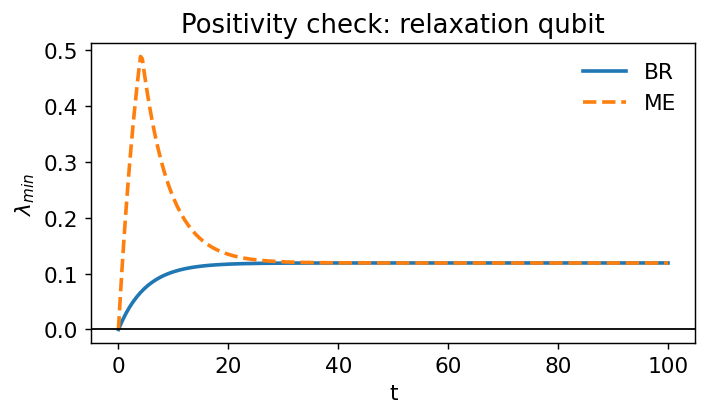

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from qutip import basis, sigmaz, sigmax, brmesolve, mesolve, DrudeLorentzEnvironment

from diagnostics import trajectory_min_eigs

from plotting import style, plot_min_eig, populations_from_states

style()

w0=1.0

H=0.5*w0*sigmaz()

A=sigmax()

bath=DrudeLorentzEnvironment(T=0.5, lam=0.2, gamma=5.0, Nk=2)

psi0=basis(2,1)

tlist=np.linspace(0,100,300)

sol_br=brmesolve(H, psi0, tlist, a_ops=[[A,bath]])

gamma_em=bath.power_spectrum(w0)

n_th = 1/(np.exp(w0/bath.T)-1)

gamma_abs = bath.power_spectrum(-w0)

sol_me=mesolve(H, psi0, tlist, c_ops=[np.sqrt(gamma_em)*basis(2,0)*basis(2,1).dag(), 
                                      np.sqrt(gamma_abs)*basis(2,1)*basis(2,0).dag()]
                                      )

min_br=trajectory_min_eigs(sol_br.states)

min_me=trajectory_min_eigs(sol_me.states)

plt.figure(figsize=(6,3))

plt.plot(tlist,min_br,label='BR')

plt.plot(tlist,min_me,label='ME',ls='--')

plt.axhline(0,color='k',lw=1)

plt.xlabel('t')

plt.ylabel(r'$\lambda_{min}$')

plt.legend(frameon=False)

plt.title('Positivity check: relaxation qubit')

plt.show()

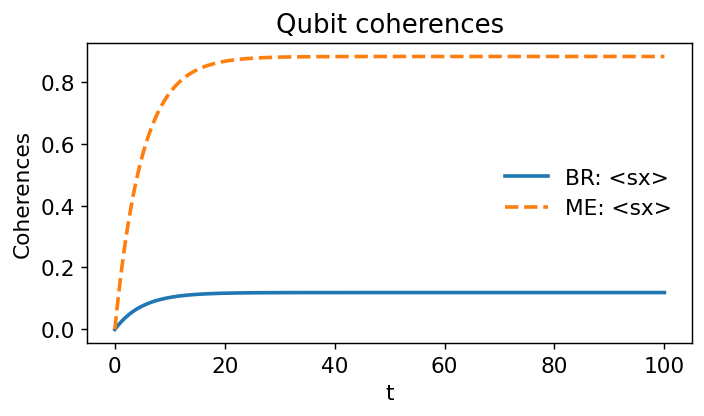

In [2]:
from qutip import sigmax, expect
def coherences_from_states(states):
    """Return coherences array shape (dim, n_times)."""
    cohs = expect(sigmax(), states)
    return cohs

cohs_br = populations_from_states(sol_br.states)
cohs_me = populations_from_states(sol_me.states)


plt.figure(figsize=(6,3))
plt.plot(tlist, cohs_br[0], label='BR: <sx>')
plt.plot(tlist, cohs_me[0], label='ME: <sx>', ls='--')
plt.ylabel('Coherences')
plt.xlabel('t')
plt.legend(frameon=False)
plt.title('Qubit coherences')
plt.show()